## Final Project Submission


 * Neal Iyer
 * Self Pace/Flex



# <span style="color: Green;">Data Introduction Summmary</span>

## <span style="color: lightGreen;">Introduce Data before presenting it in code below</span>

##### First step is to import pandas and matplot lib in order to run the code needed to analyze the data.

## <span style="color: forestGreen;">Importing Pandas and Opening Datafile to Inspect and analyze elements</span>

In [56]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




### Read in and clean data

In [57]:
planes_df = pd.read_csv('Aviation_Data.csv')

#Fill in all null values in Injuries columns
planes_df['Total.Fatal.Injuries'].fillna(0, inplace=True) 
planes_df['Total.Serious.Injuries'].fillna(0,inplace=True)
planes_df['Total.Minor.Injuries'].fillna(0,inplace=True)

#Normalize Data
planes_df["Make"] = planes_df["Make"].replace("Boeing", "BOEING")
planes_df["Make"] = planes_df["Make"].replace("BOEING-VERTOL", "BOEING")
planes_df["Make"] = planes_df["Make"].replace("Airbus Industrie", "AIRBUS")
planes_df["Make"] = planes_df["Make"].replace("AIRBUS INDUSTRIE", "AIRBUS")
planes_df["Make"] = planes_df["Make"].replace("Airbus", "AIRBUS")
planes_df["Make"] = planes_df["Make"].replace("CESSNA", "Cessna")
planes_df["Make"] = planes_df["Make"].replace("PIPER", "Piper")
planes_df["Make"] = planes_df["Make"].replace("BEECH", "Beech")

#removing any leading or trailing whitespace
planes_df['Make'] = planes_df['Make'].str.strip()

#create new column documenting total injuries, fatal + major + minor
#created weighted index based on fatal vs serious vs minor injuries
planes_df['Total Injuries'] = planes_df['Total.Fatal.Injuries'] * 0.6 + planes_df['Total.Serious.Injuries'] * 0.4 + planes_df['Total.Minor.Injuries'] * 0.2








C:\Users\neali\AppData\Local\Temp\ipykernel_5736\3523357594.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  planes_df = pd.read_csv('Aviation_Data.csv')


### <span style="color: skyblue;">After viewing the layout of the data, it is time to further filter and identify the different columns and datatypes of the file</span>.




### As we can see, most columns are objects, with a few float64 (integer) columns.  Now, I will create an adittional column titled "Total Injuries" that acts as a weighted measure of total fatal injuries, total serious injuries, and total minor injuries.

# <span style="color: brown;">Data Analysis</span>
### At this step in the process, we will begin compartmentalizing data and taking detailed looks at each aspect we want to investigate further in order to discover appropriate stakeholder solutions.  
#### First step- analyze number of total injuries per Number of Engines.

In [58]:
num_eng = planes_df.groupby('Number.of.Engines')['Total Injuries'].sum().reset_index()
num_eng_sorted = num_eng.sort_values(by='Total Injuries', ascending=False)
num_eng_sorted


,Number.of.Engines,Total Injuries
1,1.0,22399.8
2,2.0,8586.8
4,4.0,1193.8
3,3.0,894.8
0,0.0,522.6
6,8.0,9.0
5,6.0,0.0


#### Create Visualization highlighting above analysis

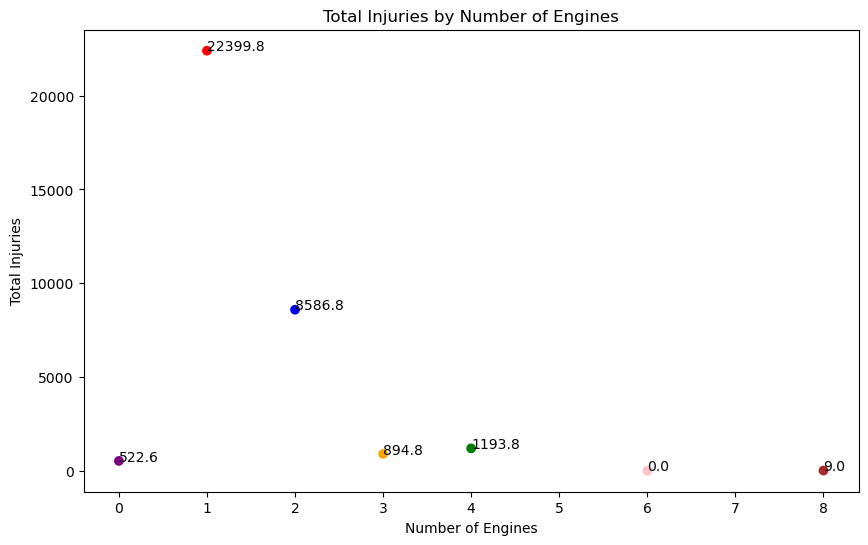

In [59]:
# Define a list of colors, one for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(num_eng_sorted['Number.of.Engines'], num_eng_sorted['Total Injuries'], color= colors)  # Create a scatter plot

# Adding title and labels
plt.title('Total Injuries by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Total Injuries')

# Set x-axis ticks to show each integer interval
plt.xticks(range(int(num_eng_sorted['Number.of.Engines'].min()), int(num_eng_sorted['Number.of.Engines'].max()) + 1))

# Optional: Add text labels next to each point for clarity
for i, txt in enumerate(num_eng_sorted['Total Injuries']):
    plt.annotate(f"{txt:.1f}", (num_eng_sorted['Number.of.Engines'].iat[i], num_eng_sorted['Total Injuries'].iat[i]))

# Show the plot
plt.show()

### Analyzing Safest and Most Injury Producing Commercial and Military Aircrafts

#### Next step is to filter further and investigate the most dangerous Commercial and Military Aircrafts.  The assumption being made is that most aircrafts with over 2 engines are commercial and military, also based on the Make (Airbus and Boeing are commercial, Lockheed is military)

In [60]:

#grouping data by number of engines, make, total injuries, counts, and percentage
consolidated_data = planes_df.groupby(['Number.of.Engines','Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

#consolidated_data['Total Injuries sum']= consolidated_data['Total Injuries'].sum()
#consolidated_data['Total Injuries count']= consolidated_data['Total Injuries'].count()

#Name columns
consolidated_data.columns= ['Number.of.Engines','Make', 'Total Injuries', 'Total Incidents']


# Calculate Injury Percentage
consolidated_data['Injury Percentage'] = consolidated_data['Total Injuries'] / consolidated_data['Total Incidents']


#FIlter out Outliers (any Makes with less than 4 incidents)
Consolidated_Filter = consolidated_data[consolidated_data['Total Incidents'] >= 4].head()





#### Construct Graph visualizing above findings on Commercial and Military Aircrafts with highest Injury Percentage with at least 4 total incidents

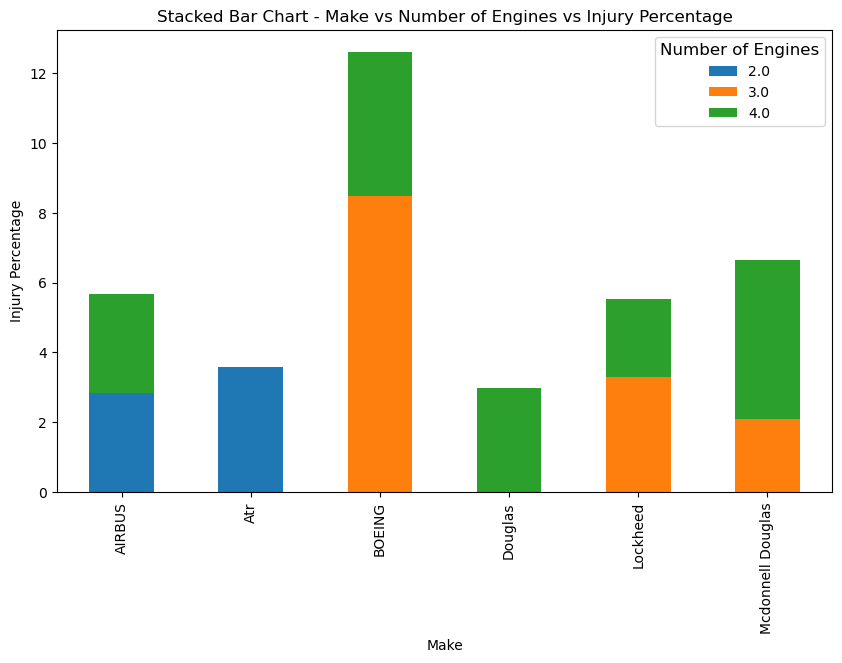

In [61]:
pivot_df = Consolidated_filter.pivot_table(index='Make', columns='Number.of.Engines', values='Injury Percentage', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart - Make vs Number of Engines vs Injury Percentage')
plt.xlabel('Make')
plt.ylabel('Injury Percentage')
plt.legend(title='Number of Engines', title_fontsize='12')
plt.show()

##### The above graph shows that Boeing aircrafts have the highest injury percentage per crash with both 3 and 4 engine planes. Mcdonnell Douglas also has a high injury percentage with their 4 engine aircrafts.  A business takeaway from this display could be to go with AIRBUS for commercial and Lockheed for Military, respectively.

##### The next task is to filter the data to display highest injury rates per non commercial and military aircrafts.  Display Count of each Make with 2 or less Engines based on Total Injuries and Total Incidents and filter out any makes with incident count less than 500.

In [62]:
# Group by specified columns and aggregate Total Injuries
outcome = planes_df.groupby(['Number.of.Engines', 'Purpose.of.flight', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
outcome.columns = ['Number.of.Engines', 'Purpose.of.flight', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
outcome['Injury Percentage'] = outcome['Total Injuries'] / outcome['Total Incidents']


# Filter the DataFrame by 'Injury Percentage' in descending order
outcome = outcome[(outcome['Total Incidents'] > 10) & (outcome['Number.of.Engines'] <= 2)]

#Filtered Data to include total incidents over 500
sum_outcome = outcome.groupby(['Make', 'Number.of.Engines'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
sum_outcome = sum_outcome[sum_outcome['Total Incidents'] > 500]
sum_outcome['Injury Percentage'] = sum_outcome['Total Injuries'] / sum_outcome['Total Incidents']


##### Display Count of each Make with 2 or less Engines based on Total Injuries and Total Incidents and filter out any makes with incident count less than 500.

##### Visualize the above data in a graph best fitting

<Figure size 1200x800 with 0 Axes>

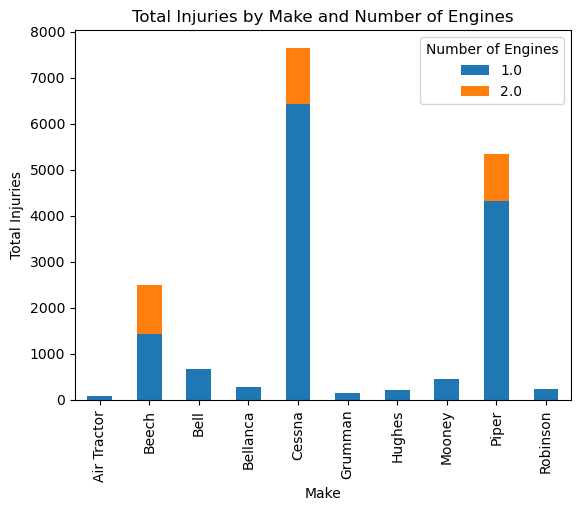

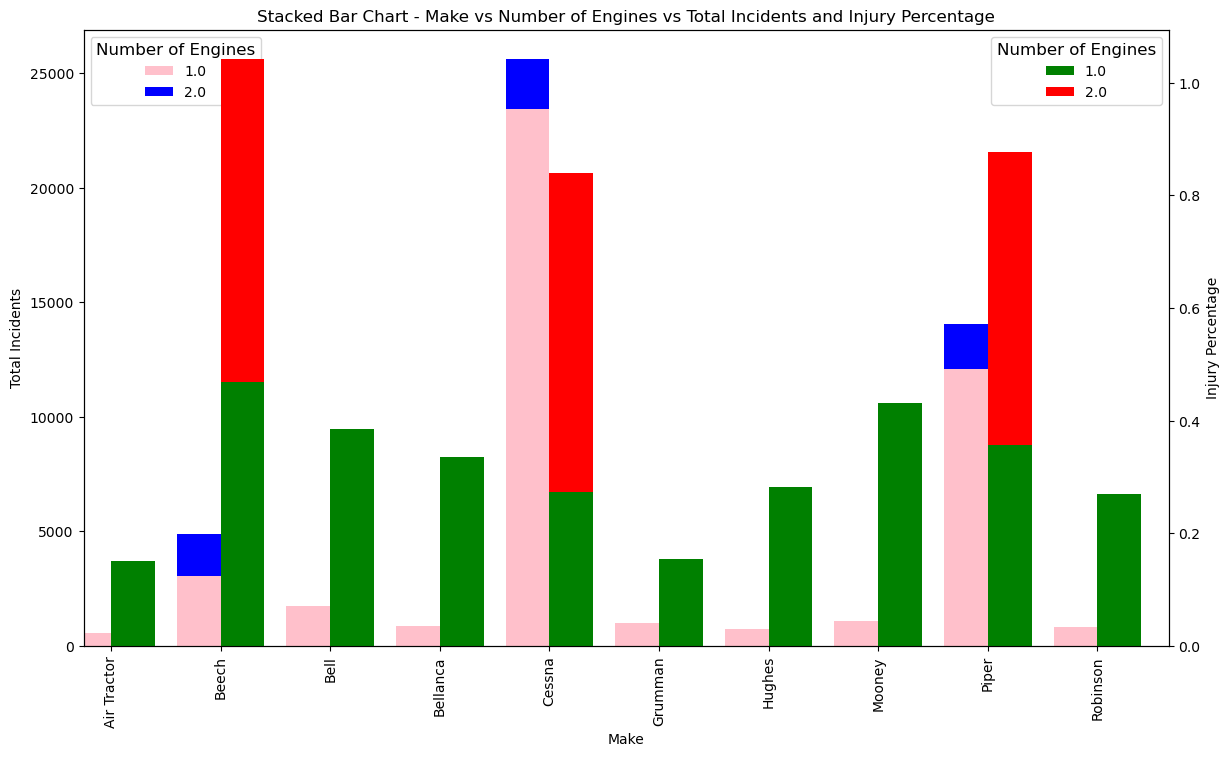

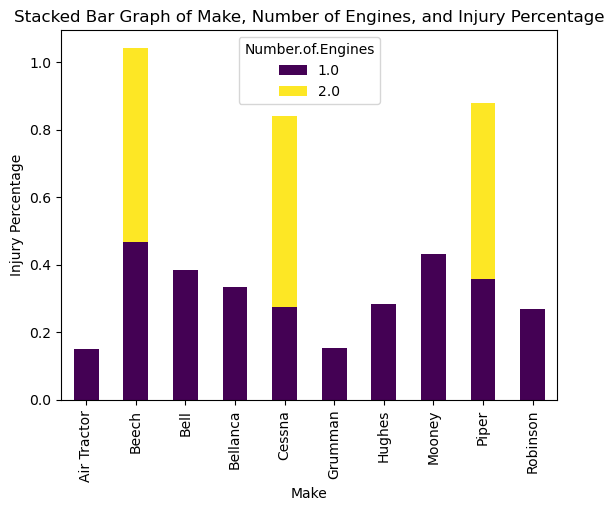

In [63]:
# Plot 1: Bar Plot for Total Injuries
plt.figure(figsize=(12, 8))
bar_plot = sum_outcome.groupby(['Make', 'Number.of.Engines'])['Total Injuries'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Total Injuries by Make and Number of Engines')
plt.xlabel('Make')
plt.ylabel('Total Injuries')
plt.legend(title='Number of Engines')
plt.show()

# Plot 2: Bar Plot for Total Incidents and Injury Percentage
# Pivot the data for stacked bar chart
pivot_df2 = sum_outcome.pivot_table(index='Make', columns='Number.of.Engines', values=['Total Incidents', 'Injury Percentage'], aggfunc='sum', fill_value=0)

# Plot the stacked bar chart with secondary y-axis for Injury Percentage
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Total Incidents on primary y-axis
pivot_df2['Total Incidents'].plot(kind='bar', stacked=True, ax=ax1, color=['pink', 'blue'], position=1, width=0.4)

# Create a secondary y-axis for Injury Percentage
ax2 = ax1.twinx()
pivot_df2['Injury Percentage'].plot(kind='bar', stacked=True, ax=ax2, color=['green', 'red'], position=0, width=0.4)

# Set labels and title
ax1.set_title('Stacked Bar Chart - Make vs Number of Engines vs Total Incidents and Injury Percentage')
ax1.set_xlabel('Make')
ax1.set_ylabel('Total Incidents', color='black')
ax2.set_ylabel('Injury Percentage', color='black')

# Set legends
ax1.legend(title='Number of Engines', title_fontsize='12', loc='upper left')
ax2.legend(title='Number of Engines', title_fontsize='12', loc='upper right')

plt.show()

# Plot 3: Stacked Bar Graph for Injury Percentage
# Create a stacked bar graph
pivot_df3 = sum_outcome.pivot(index='Make', columns='Number.of.Engines', values='Injury Percentage')
pivot_df3.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Make')
plt.ylabel('Injury Percentage')
plt.title('Stacked Bar Graph of Make, Number of Engines, and Injury Percentage')

# Show the plot
plt.show()

##### The Above cell shows that amongst personal aircrafts (2 engines or less), Cessnas have the most total injuries but also the most total incidents, meaning Cessna's are used much more frequently.  The results also show that although Cessna's have the most total injuries, Cessna's overall injury perentage is much lower than the other Aircraft Make's with both 1 and 2 engines, including Cessna 2 Engine Planes. Thus, a conclusion could be made that Cessna 1 engine aircrafts are the safest to use.

## Step 2-  Analyze data to show highest rates of injuries among Phase of Flights

#### Next, we will analyze safest and most dangerous aircrafts based on Phases of flight (Cruise, Takeoff, Maneuvering, Landing, etc)


In [64]:
# Group by specified columns and aggregate Total Injuries
num_phase = planes_df.groupby(['Broad.phase.of.flight'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
num_phase.columns = ['Broad.phase.of.flight', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
num_phase['Injury Percentage'] = num_phase['Total Injuries'] / num_phase['Total Incidents']

num_phase.sort_values(by='Total Injuries', ascending=False)

,Broad.phase.of.flight,Total Injuries,Total Incidents,Injury Percentage
2,Cruise,5483.2,10269,0.533957
9,Takeoff,4828.6,12493,0.386504
6,Maneuvering,4354.6,8144,0.534700
0,Approach,3578.4,6546,0.546654
1,Climb,1492.0,2034,0.733530
5,Landing,1446.2,15428,0.093739
3,Descent,936.6,1887,0.496343
4,Go-around,631.8,1353,0.466962
11,Unknown,472.4,548,0.862044
8,Standing,272.4,945,0.288254


### Create Visualization of above Data on Broad Phase of Flights

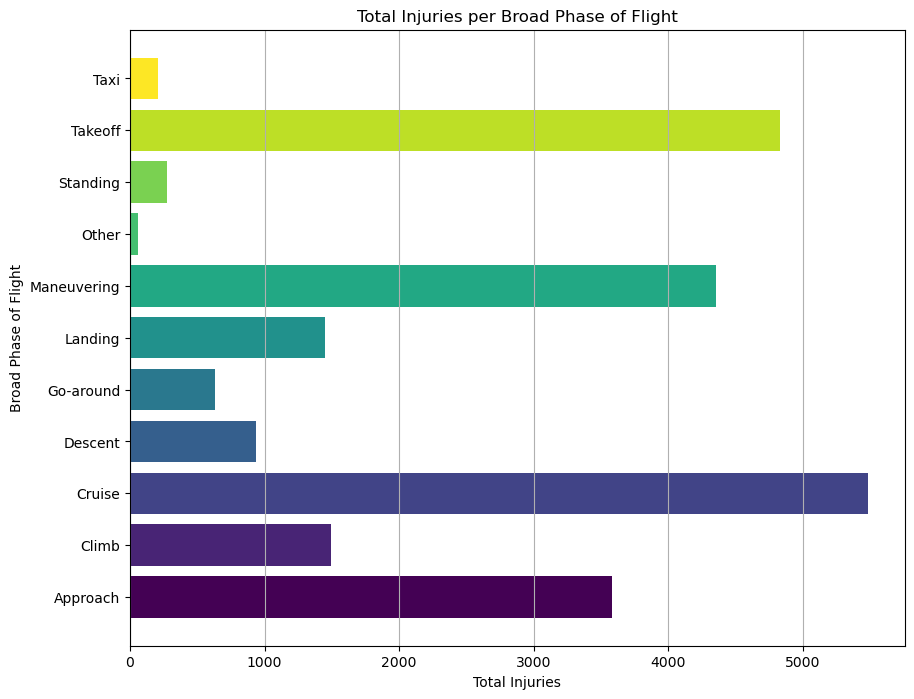

In [65]:

filtered_num_phase = num_phase[num_phase['Broad.phase.of.flight'] != 'Unknown']

# Color
num_colors = len(filtered_num_phase['Broad.phase.of.flight'])
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

# Plotting
plt.figure(figsize=(10, 8))
bar = plt.barh(filtered_num_phase['Broad.phase.of.flight'], filtered_num_phase['Total Injuries'], color=colors)
plt.xlabel('Total Injuries')
plt.ylabel('Broad Phase of Flight')
plt.title('Total Injuries per Broad Phase of Flight')
plt.grid(axis='x')

# Show
plt.show()

### Now that we have a general outline of Injury percentages based on phase of flight, we are going to delve deeper and filter the data by make and number of engines.  The idea behind this is to understand which Aircrafts have the highest and lowest injury percentage per phase of flight in order to determine an appropriate resolution for stakeholders.

In [66]:
# Group by specified columns and aggregate Total Injuries
phase_counts = planes_df.groupby(['Broad.phase.of.flight', 'Number.of.Engines', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
phase_counts.columns = ['Broad.phase.of.flight', 'Number.of.Engines', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
phase_counts['Injury Percentage'] = phase_counts['Total Injuries'] / phase_counts['Total Incidents']

# Sort the DataFrame by 'Injury Percentage' in descending order
phase_counts = phase_counts[(phase_counts['Total Incidents'] > 10) & (phase_counts['Number.of.Engines'] <= 8)]

#create filtered_phase to show injury percentage per phase of flight for incident counts over 500
filtered_phase = phase_counts.groupby(['Broad.phase.of.flight', 'Number.of.Engines', 'Make'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
filtered_phase = filtered_phase[filtered_phase['Total Incidents'] > 500]
filtered_phase['Injury Percentage'] = filtered_phase['Total Injuries'] / filtered_phase['Total Incidents']
filtered_phase.sort_values(by='Injury Percentage', ascending=False)

,Broad.phase.of.flight,Number.of.Engines,Make,Total Injuries,Total Incidents,Injury Percentage
233,Maneuvering,1.0,Cessna,1072.6,1750,0.612914
73,Cruise,1.0,Beech,302.6,513,0.589864
257,Maneuvering,1.0,Piper,578.4,991,0.583653
98,Cruise,1.0,Piper,959.4,1732,0.553926
302,Takeoff,1.0,Beech,262.4,538,0.487732
24,Approach,1.0,Piper,445.8,970,0.459588
76,Cruise,1.0,Cessna,1321.0,3170,0.416719
230,Maneuvering,1.0,Bell,246.4,600,0.410667
326,Takeoff,1.0,Piper,753.8,2105,0.358100
11,Approach,1.0,Cessna,629.4,1807,0.348312


### Based on the above data and charts, Cessna has the highest overall injury percentage for the 5 most prevalent common phases of flight.  
#### One may also deduce that, based on the findings, both Cessna and Piper are safest with their landing procedures, as both have the highest incident count and lowest injury totals for all "landing" phases of flight.  

### Contrastingly, Cessna's "Maneuvering" phase of flight has the highest injury percentage by far with the lowest amount of incidents.  
#### Apart of "Maneuvering" resulting in many injuries, it appears that the "Cruise" phase of flight results in a large percentage of injuries for both Cessna and Piper, with Cessna's largest amount of injuries and second highest percentage all coming from flights in the "Cruise" phase of flight.

## Next, an Analysis on Injuries based on Engine Type

In [67]:

# Group by 'Engine.Type' and aggregate 'Total Injuries'
engine_injure = planes_df.groupby('Engine.Type')['Total Injuries'].agg(['sum', 'count']).reset_index()

# Calculate Injury Percentage correctly
# 'sum' refers to the total injuries, and 'count' refers to the number of incidents
engine_injure['Injury Percentage'] = engine_injure['sum'] / engine_injure['count']

# Rename columns to make them more descriptive
engine_injure.columns = ['Engine.Type', 'Total Injuries', 'Total Incidents', 'Injury Percentage']





### Create Visualization to display above initial findings

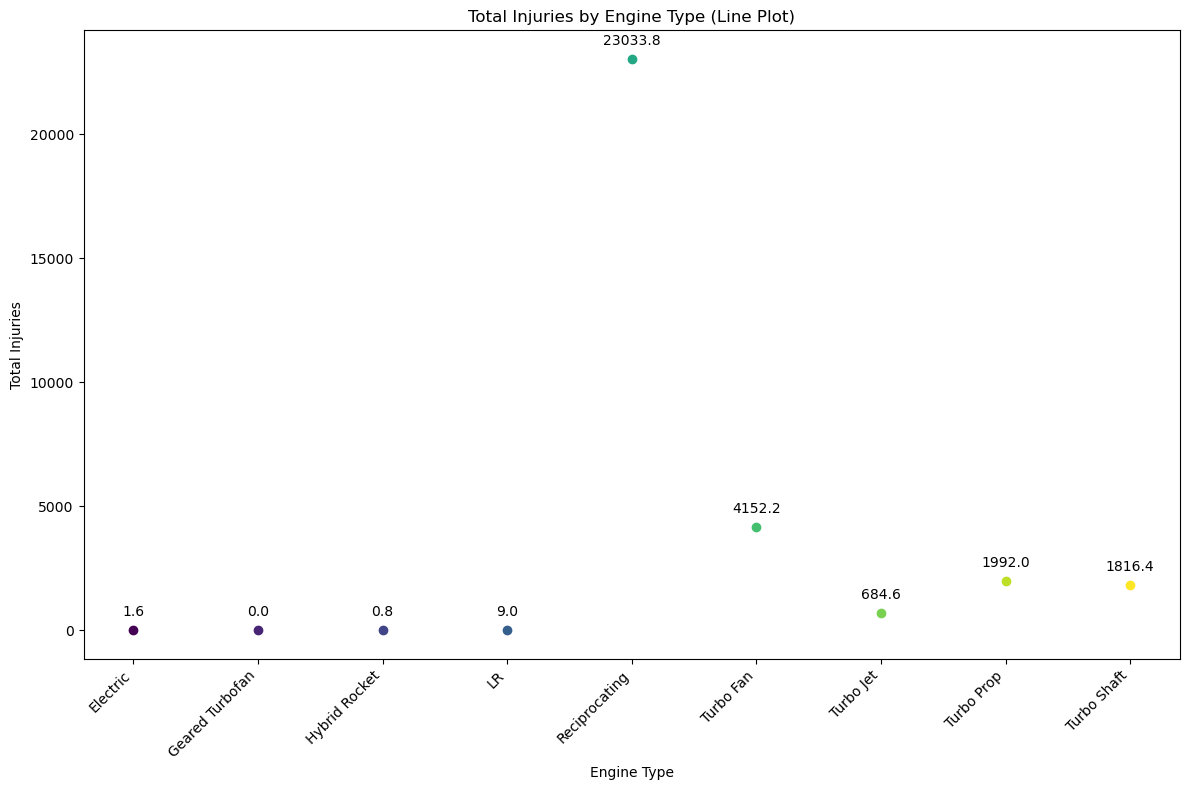

In [68]:
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Assuming Engine_filtered['Engine.Type'] is categorical and you want each category to have its own color
# First, ensure 'Engine.Type' is sorted if it isn't already, as you've done
Engine_filtered = engine_injure.sort_values(by='Engine.Type')

Engine_filtered = Engine_filtered[~Engine_filtered['Engine.Type'].str.lower().isin(['none', 'unk', 'unknown'])]


# Plot each point individually
for i, row in Engine_filtered.iterrows():
    plt.plot(row['Engine.Type'], row['Total Injuries'], marker='o', linestyle='', color=colors[i % len(colors)])

plt.xlabel('Engine Type')  # X-axis label
plt.ylabel('Total Injuries')  # Y-axis label
plt.title('Total Injuries by Engine Type (Line Plot)')  # Chart title

# Fix for the xticks error: manually set the ticks and labels
ticks = range(len(Engine_filtered['Engine.Type'].unique()))
labels = Engine_filtered['Engine.Type'].unique()
plt.xticks(ticks, labels, rotation=45, ha="right")

# Adding text labels for each marker
for i, txt in enumerate(Engine_filtered['Total Injuries']):
    # Adjusting the annotation to align with the corrected ticks
    plt.annotate(f"{txt:.1f}", (ticks[i % len(ticks)], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


### Investigate further by analyzing total injuries, incidents, and injury percentage by engine type with make and number of engines

In [69]:
 #Group by specified columns and aggregate Total Injuries
engine_t_outcome = planes_df.groupby(['Number.of.Engines', 'Engine.Type', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
engine_t_outcome.columns = ['Number.of.Engines', 'Engine.Type', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
engine_t_outcome['Injury Percentage'] = engine_t_outcome['Total Injuries'] / engine_t_outcome['Total Incidents']

engine_t_outcome = engine_t_outcome[(engine_t_outcome['Total Injuries'] > 200) & (engine_t_outcome['Number.of.Engines'] >= 1)]

#Filter overall results by best fitting cases of total injuries >500
engine_t_filter_outcome = engine_t_outcome.groupby(['Number.of.Engines', 'Engine.Type', 'Make'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
engine_t_filter_outcome = engine_t_filter_outcome[engine_t_filter_outcome['Total Injuries'] > 500]
engine_t_filter_outcome['Injury Percentage'] = engine_t_filter_outcome['Total Injuries'] / engine_t_filter_outcome['Total Incidents']

### Create visualization to represent 

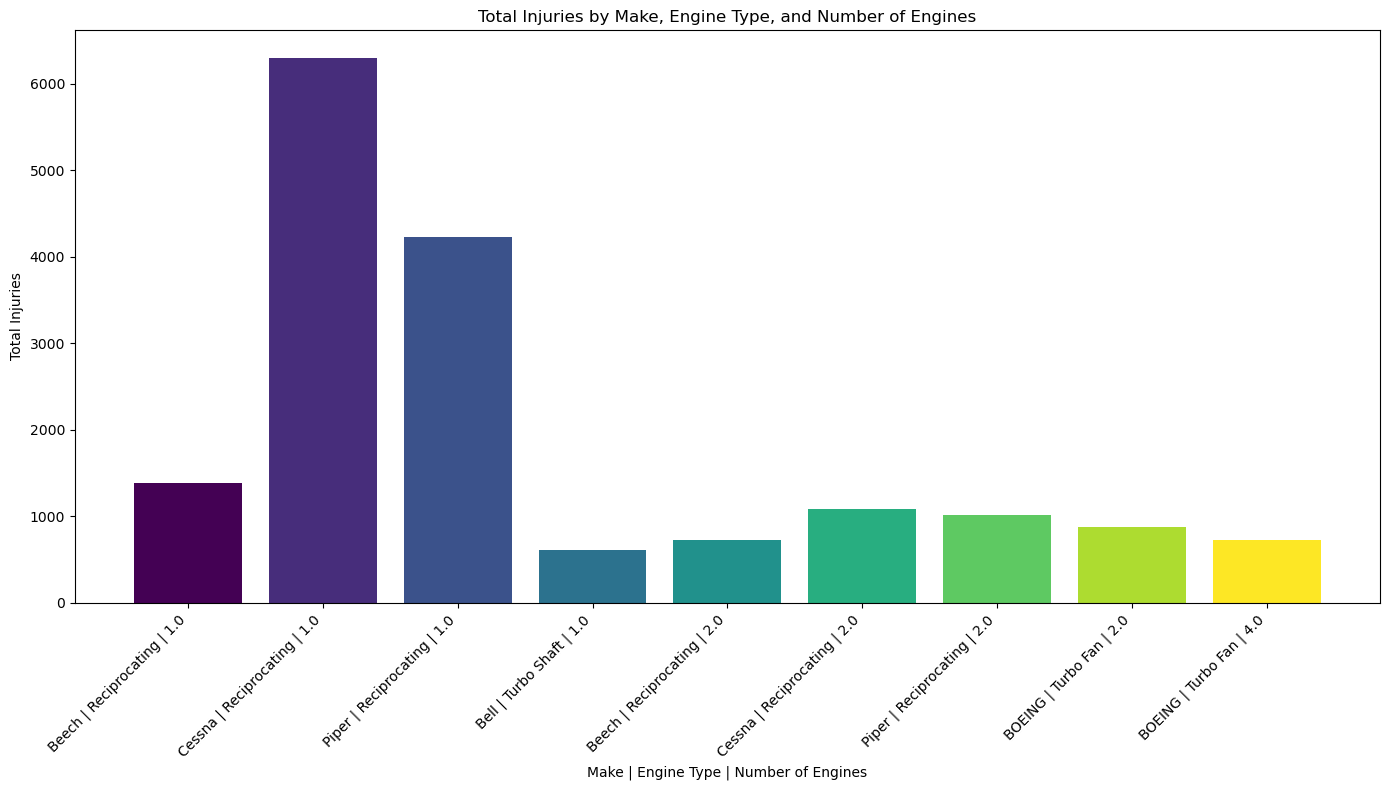

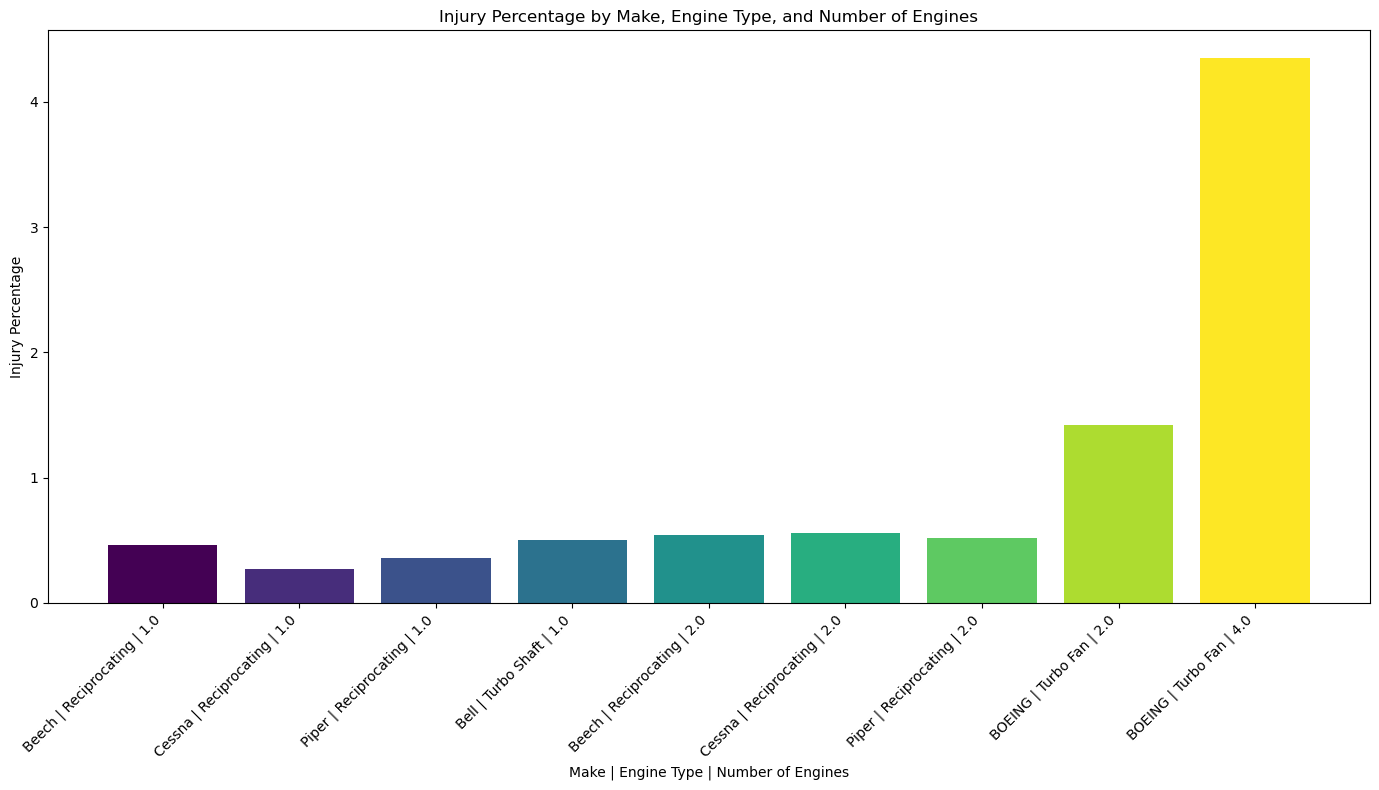

In [70]:

# Creating a new column for the X-axis labels
engine_t_filter_outcome['Label'] = engine_t_filter_outcome['Make'] + ' | ' + engine_t_filter_outcome['Engine.Type'] + ' | ' + engine_t_filter_outcome['Number.of.Engines'].astype(str)

# Use a colormap to generate a list of colors based on the number of unique labels
colors = plt.cm.viridis(np.linspace(0, 1, len(engine_t_filter_outcome['Label'])))

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the size as needed
plt.bar(engine_t_filter_outcome['Label'], engine_t_filter_outcome['Total Injuries'], color=colors)  # Pass the list of colors here
plt.xlabel('Make | Engine Type | Number of Engines')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha="right")  # Rotate labels to avoid overlap
plt.title('Total Injuries by Make, Engine Type, and Number of Engines')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

# Creating a new column for the X-axis labels
engine_t_filter_outcome['Label'] = engine_t_filter_outcome['Make'] + ' | ' + engine_t_filter_outcome['Engine.Type'] + ' | ' + engine_t_filter_outcome['Number.of.Engines'].astype(str)

# Use a colormap to generate a list of colors based on the number of unique labels
colors = plt.cm.viridis(np.linspace(0, 1, len(engine_t_filter_outcome['Label'])))

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the size as needed
plt.bar(engine_t_filter_outcome['Label'], engine_t_filter_outcome['Injury Percentage'], color=colors)  # Pass the list of colors here
plt.xlabel('Make | Engine Type | Number of Engines')
plt.ylabel('Injury Percentage')
plt.xticks(rotation=45, ha="right")  # Rotate labels to avoid overlap
plt.title('Injury Percentage by Make, Engine Type, and Number of Engines')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

#### Based on the above data on enginge types, although Cessna Reciprocating 1 engine planes have the most injuries, they appear to also be the safest to fly based on the amount of incidents and resulting low injury percentage (just under 30%)

# Conclusion


## The main takeaways one could assume based on the above data and visualizations are as follows:

#### -Airbus appears to be the safest choice for Commercial Airline travel and Lockheed for Military Travel/Transport, as Boeing and Mcdonnell Douglas both have high injury percentages for multiple engine type air carriers.

#### -Cessna 1 Engine and both Cessna and Piper 2 Engine appear to be the safest choices for personal aircraft travel, with Cessna 1 engine planes having a high injury total but the lowest injury percentage, and Cessna and Piper 2 engine planes having the lowest injury percentage amongst the respective group.  

#### -When it comes to phase of flight, both Cessna and Piper are safest with their landing procedures, as both have the highest incident count and lowest injury totals for all "landing" phases of flight.  Contrastingly, Cessna's "Maneuvering" phase of flight has the highest injury percentage by far with the lowest amount of incidents.  

#####   -Apart of "Maneuvering" resulting in many injuries, it appears that the "Cruise" phase of flight results in a large percentage of injuries for both Cessna and Piper, with Cessna's largest amount of injuries and second highest percentage all coming from flights in the "Cruise" phase of flight.    

#####  -One solution to this issue would be to implement more training programs for pilots pertaining to the "Maneuvering" phase of flight, as Cessna aircrafts have the highest injury percentage in this phase by far.  

#### -Finally, regarding engine type, although Cessna Reciprocating 1 engine planes have the most injuries, they appear to also be the safest to fly based on the amount of incidents and resulting low injury percentage (just under 30%)